# **Universidad Paraguayo Alemana**
## Facultad de Ciencias Empresariales
### Ingeniería en Tecnologías de la Información Empresarial


---



# **Open Data & Big Data**

## Proyecto de Big Data & Machine Learning

### Sistema de Recomendación de Películas

Tobías González Vera

San Lorenzo, 2024



---



# Resumen

Este trabajo de Big Data y Machine Learning se centra en el desarrollo de un sistema de recomendación de películas. Para llevar a cabo este proyecto, se utilizó una muestra de datos del Movies Dataset obtenida a través de Kaggle. El primer paso del proyecto implicó la limpieza y exploración de los datos para comprender su estructura y contenido, utilizando gráficos para visualizar y analizar las características clave.

A continuación, se calcularon similitudes utilizando la métrica de similitud de coseno y se combinaron géneros y palabras clave para enriquecer los datos. Estos pasos fueron fundamentales para la construcción de dos sistemas de recomendación iniciales: uno basado en contenido y otro basado en colaboraciones. Posteriormente, ambos sistemas fueron fusionados para crear un sistema híbrido que aprovechara las fortalezas de cada uno.

Finalmente, el sistema híbrido fue evaluado utilizando métricas de evaluación específicas para sistemas de recomendación, asegurando así su funcionalidad y efectividad. Las pruebas realizadas demostraron que el sistema es capaz de proporcionar recomendaciones precisas y útiles a los usuarios, cumpliendo con los objetivos planteados al inicio del proyecto.

# 1. Datos del proyecto

### Sobre los datos del proyecto

Los datos utilizados en este proyecto fueron obtenidos de Kaggle, específicamente del dataset titulado ["The Movies Dataset](https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=ratings.csv)". Este dataset contiene información sobre más de 45,000 películas y 26 millones de valoraciones realizadas por más de 270,000 usuarios. Las películas incluidas en el dataset fueron lanzadas hasta julio de 2017.

Este dataset incluye metadatos de todas las películas listadas en el Full MovieLens Dataset. Los puntos de datos incluyen información sobre el elenco, equipo, palabras clave de la trama, presupuesto, ingresos, carteles, fechas de lanzamiento, idiomas, compañías de producción, países de producción, recuentos de votos y promedios de votos de TMDB. Además, incluye archivos que contienen 26 millones de valoraciones de 270,000 usuarios para todas las 45,000 películas del dataset. Las valoraciones están en una escala de 1 a 5 y han sido obtenidas del sitio web oficial de GroupLens.

Este dataset fue ensamblado como parte de un proyecto de capstone para el programa de Data Science de Springboard. El objetivo es realizar un análisis exploratorio de datos (EDA) extenso sobre los datos de películas para narrar la historia del cine y utilizar estos metadatos en combinación con las valoraciones de MovieLens para construir varios tipos de sistemas de recomendación.

### Contenido

El dataset consiste en los siguientes archivos:

- movies_metadata.csv: Archivo principal de metadatos de películas, contiene información sobre 45,000 películas. Incluye características como carteles, presupuestos, ingresos, fechas de lanzamiento, idiomas, países de producción y compañías.
- ratings.csv: Archivo con las 26 millones de valoraciones.
- keywords.csv: Contiene las palabras clave de la trama para las películas de MovieLens, en forma de objeto JSON.
- credits.csv: Información del elenco y el equipo de todas las películas, en forma de objeto JSON.
links.csv: Contiene los IDs de TMDB e IMDB de todas las películas del Full MovieLens Dataset.
- links_small.csv: Subconjunto de 9,000 películas del dataset completo, con sus respectivos IDs de TMDB e IMDB.
- ratings_small.csv: Subconjunto de 100,000 valoraciones de 700 usuarios sobre 9,000 películas.


El dataset completo de MovieLens, que consiste en 26 millones de valoraciones y 750,000 aplicaciones de etiquetas de 270,000 usuarios sobre las 45,000 películas, está disponible en el sitio web de GroupLens.

### Licencia

El dataset está disponible bajo la licencia CC0 1.0 Universal (CC0 1.0). Esta licencia permite copiar, modificar, distribuir y ejecutar el trabajo, incluso con fines comerciales, sin pedir permiso. Sin embargo, no afecta los derechos de patente o marca de ninguna persona, ni los derechos de privacidad o publicidad que otras personas puedan tener en el trabajo.

### Subconjunto de datos para el proyecto

Para este proyecto, se ha tomado una muestra de 1,000 usuarios y 10,000 valoraciones, junto con el archivo completo de palabras clave (keywords.csv). Esto nos permite trabajar con un subconjunto manejable del dataset completo, facilitando el desarrollo y evaluación de los modelos de recomendación.

## Edición y preparación de los Datos

### Importar las librerías necesarias

In [5]:
# Importar librerías necesarias
import os  # Para manejar operaciones del sistema operativo, como la carga de archivos
import pandas as pd  # Para manipulación y análisis de datos
import numpy as np  # Para operaciones numéricas avanzadas
import matplotlib.pyplot as plt  # Para visualización de datos
import seaborn as sns  # Para visualización de datos, basado en matplotlib

# Librerías adicionales para procesamiento de datos
from google.colab import files  # Para cargar archivos desde la computadora local

### Importar los datos

In [6]:
# Importar el archivo
uploaded = files.upload()

# Leer los archivos CSV en DataFrames
sampled_movies = pd.read_csv("sampled_movies.csv")
sampled_ratings = pd.read_csv("sampled_ratings.csv")
keywords = pd.read_csv("keywords.csv")

# Mostrar la cantidad de filas y columnas de cada DataFrame
print(f"Cantidad de filas y columnas en sampled_movies: {sampled_movies.shape}")
print(f"Cantidad de filas y columnas en sampled_ratings: {sampled_ratings.shape}")
print(f"Cantidad de filas y columnas en keywords: {keywords.shape}")

# Mostrar las columnas de cada DataFrame
print("Columnas en sampled_movies:")
print(sampled_movies.columns.tolist())

print("Columnas en sampled_ratings:")
print(sampled_ratings.columns.tolist())

print("Columnas en keywords:")
print(keywords.columns.tolist())

# Mostrar las primeras filas de cada DataFrame para verificar
print("Primeras filas de sampled_movies:")
print(sampled_movies.head())

print("Primeras filas de sampled_ratings:")
print(sampled_ratings.head())

print("Primeras filas de keywords:")
print(keywords.head())

Saving sampled_movies.csv to sampled_movies.csv
Saving sampled_ratings.csv to sampled_ratings.csv
Saving keywords.csv to keywords.csv
Cantidad de filas y columnas en sampled_movies: (1000, 24)
Cantidad de filas y columnas en sampled_ratings: (10000, 4)
Cantidad de filas y columnas en keywords: (46419, 2)
Columnas en sampled_movies:
['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']
Columnas en sampled_ratings:
['userId', 'movieId', 'rating', 'timestamp']
Columnas en keywords:
['id', 'keywords']
Primeras filas de sampled_movies:
   adult belongs_to_collection   budget  \
0  False                   NaN        0   
1  False                   NaN        0   
2  False                   NaN  1000000   
3  Fal

### Limpieza de datos

A continuación, vamos con la limpieza de datos, tomando en cuenta estas etapas.
- Eliminación de filas completamente vacías: Utiliza el método dropna para eliminar las filas que no tienen ningún valor. Esto se hace con el parámetro how='all', que especifica que se eliminen las filas solo si todas sus columnas están vacías. Luego, muestra la cantidad de filas eliminadas debido a este motivo.

- Eliminación de filas duplicadas: Emplea el método drop_duplicates para eliminar las filas que son idénticas en todas sus columnas. Después de eliminar las duplicadas, muestra la cantidad de filas eliminadas por este motivo.

- Verificación de datos faltantes: Utiliza el método isnull().sum() para contar la cantidad de valores faltantes en cada columna del DataFrame después de la limpieza.

Después de cada una de estas etapas, la función muestra mensajes informativos para indicar qué se está haciendo. Al final, la función devuelve el DataFrame limpio.

In [7]:
# Función para limpiar DataFrame
def clean_dataframe(df, df_name):
    print(f"\nLimpiando {df_name}:")

    # Eliminar filas completamente vacías
    initial_shape = df.shape
    df.dropna(how='all', inplace=True)
    print(f"Filas eliminadas por estar completamente vacías: {initial_shape[0] - df.shape[0]}")

    # Eliminar filas duplicadas
    initial_shape = df.shape
    df.drop_duplicates(inplace=True)
    print(f"Filas eliminadas por duplicadas: {initial_shape[0] - df.shape[0]}")

    # Verificar datos faltantes
    print("Datos faltantes después de la limpieza:")
    print(df.isnull().sum())

    return df

# Limpiar los DataFrames
sampled_movies_clean = clean_dataframe(sampled_movies, "sampled_movies")
sampled_ratings_clean = clean_dataframe(sampled_ratings, "sampled_ratings")
keywords_clean = clean_dataframe(keywords, "keywords")

# Mostrar las primeras filas de cada DataFrame limpio para verificar
print("\nPrimeras filas de sampled_movies_clean:")
print(sampled_movies_clean.head())

print("\nPrimeras filas de sampled_ratings_clean:")
print(sampled_ratings_clean.head())

print("\nPrimeras filas de keywords_clean:")
print(keywords_clean.head())



Limpiando sampled_movies:
Filas eliminadas por estar completamente vacías: 0
Filas eliminadas por duplicadas: 0
Datos faltantes después de la limpieza:
adult                      0
belongs_to_collection    902
budget                     0
genres                     0
homepage                 837
id                         0
imdb_id                    1
original_language          0
original_title             0
overview                  18
popularity                 0
poster_path                3
production_companies       0
production_countries       0
release_date               0
revenue                    0
runtime                    5
spoken_languages           0
status                     0
tagline                  558
title                      0
video                      0
vote_average               0
vote_count                 0
dtype: int64

Limpiando sampled_ratings:
Filas eliminadas por estar completamente vacías: 0
Filas eliminadas por duplicadas: 0
Datos faltantes después 

# 2. Exploración de Datos (EDA)

Exploramos los datos para obtener una comprensión inicial y visualizar patrones y relaciones.


### Distribución de Calificaciones de Películas

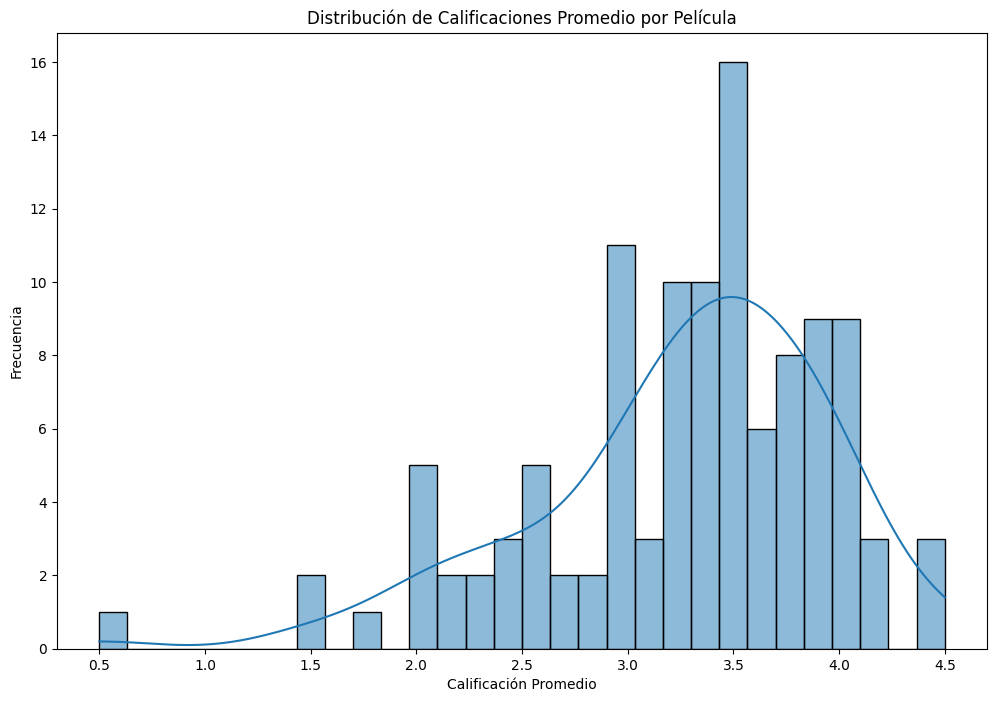

In [6]:
# Calificaciones promedio por película
avg_ratings_per_movie = sampled_ratings_clean.groupby('movieId')['rating'].mean()

# Visualizar la distribución de calificaciones promedio por película
plt.figure(figsize=(12, 8))
sns.histplot(avg_ratings_per_movie, bins=30, kde=True)
plt.title('Distribución de Calificaciones Promedio por Película')
plt.xlabel('Calificación Promedio')
plt.ylabel('Frecuencia')
plt.show()

En este gráfico se observa la distribución de calificaciones promedio asignadas a las películas. La moda, es decir, la calificación más frecuente, es 3.5. Le siguen en frecuencia las calificaciones de 3, 2, 5 y 1. Las calificaciones enteras como 1, 2, 3, 4 y 5 tienden a recibir más votos en comparación con valores intermedios como 2.5 o 3.5.

### Top 20 usuarios más activos

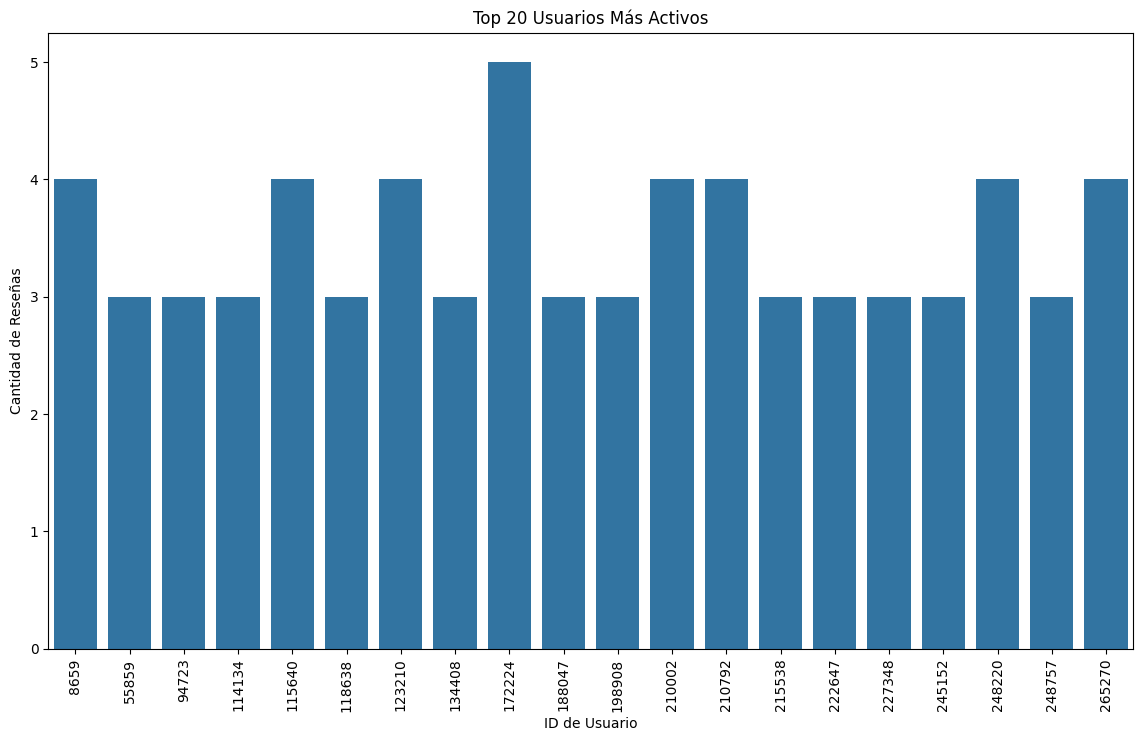

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cantidad de reseñas por usuario
reviews_per_user = sampled_ratings_clean['userId'].value_counts()

# Los 20 usuarios más activos
top_users = reviews_per_user.head(20).sort_values(ascending=False)

# Visualizar los 20 usuarios más activos
plt.figure(figsize=(14, 8))
sns.barplot(x=top_users.index, y=top_users.values)
plt.title('Top 20 Usuarios Más Activos')
plt.xlabel('ID de Usuario')
plt.ylabel('Cantidad de Reseñas')
plt.xticks(rotation=90)
plt.show()

Este gráfico muestra las calificaciones otorgadas por los 20 usuarios más activos de la muestra. Se puede ver que estos usuarios tienen un rango de 3 a 5 calificaciones, lo cual es un número relativamente bajo, pero aún significativo para el análisis.


### Relación entre el Presupuesto y la Calificación Promedio

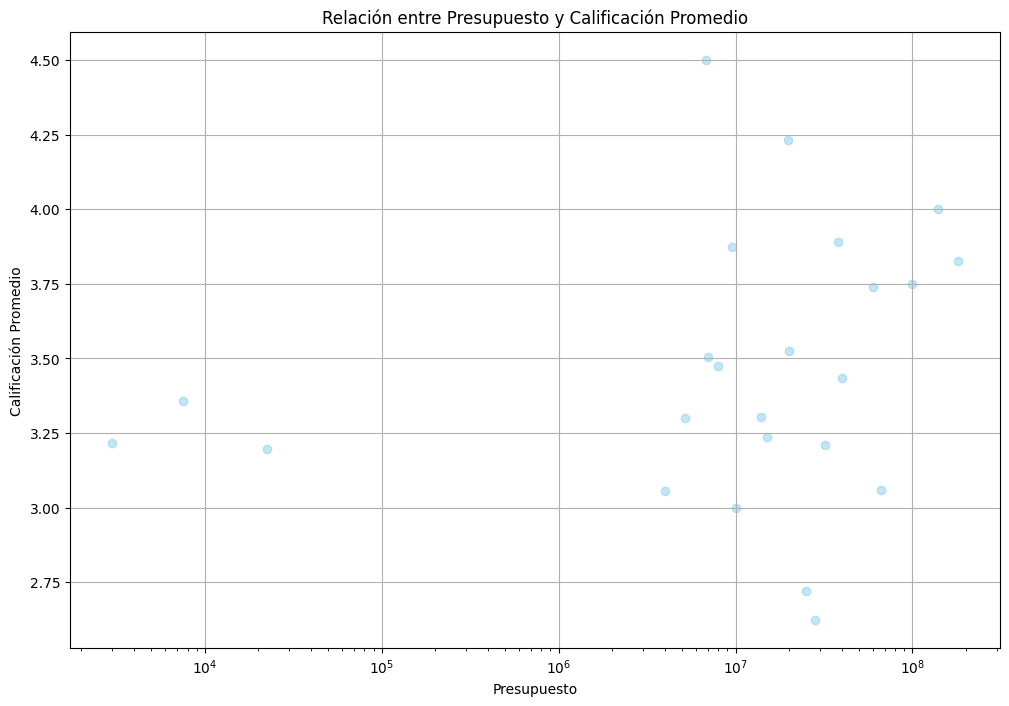

In [15]:
# Relación entre presupuesto y calificación promedio
sampled_movies_ratings = sampled_ratings.merge(sampled_movies[['id', 'budget']], left_on='movieId', right_on='id')
avg_rating_per_budget = sampled_movies_ratings.groupby('budget')['rating'].mean()

# Visualizar la relación entre presupuesto y calificación promedio
plt.figure(figsize=(12, 8))
plt.scatter(avg_rating_per_budget.index, avg_rating_per_budget, alpha=0.5, color='skyblue')
plt.title('Relación entre Presupuesto y Calificación Promedio')
plt.xlabel('Presupuesto')
plt.ylabel('Calificación Promedio')
plt.xscale('log')  # Escala logarítmica para mejor visualización
plt.grid(True)
plt.show()

En este gráfico se analiza la relación entre el presupuesto de las películas y su calificación promedio. Se destaca que una de las películas con mayor presupuesto también tiene una de las mejores calificaciones. La mayoría de las películas tienen presupuestos que oscilan entre 1 millón y 100 millones de dólares, con una concentración mayor entre 10 y 100 millones. Las películas con mejores calificaciones suelen encontrarse en este rango de presupuesto.


### Año de Lanzamiento y Presupuesto Promedio

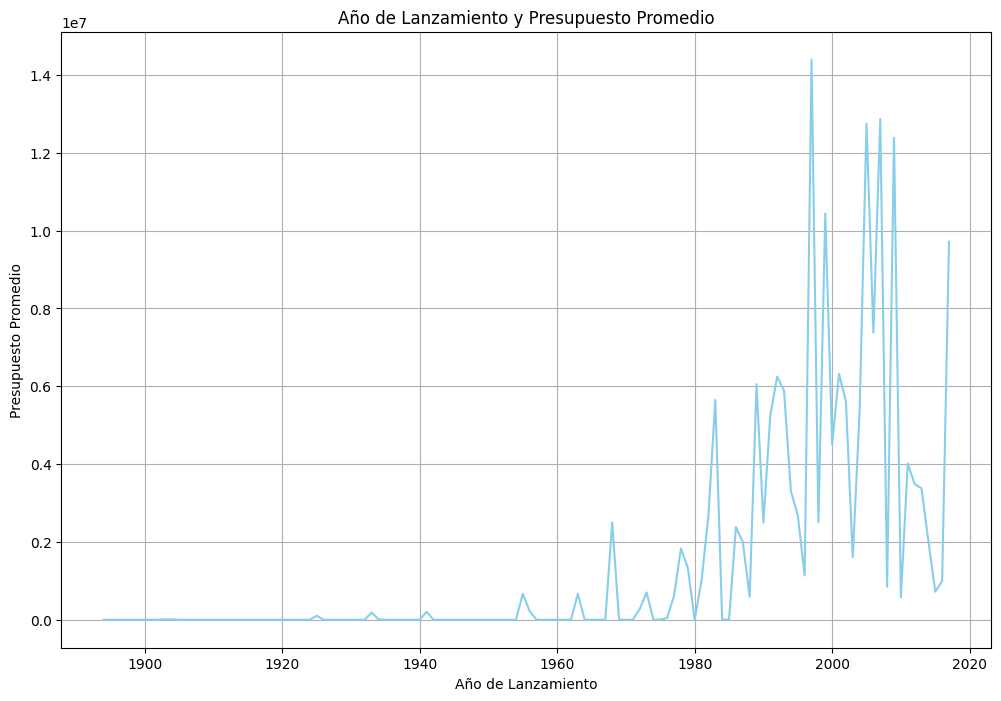

In [20]:
# Convertir release_date a datetime y extraer el año
sampled_movies['release_date'] = pd.to_datetime(sampled_movies['release_date'], errors='coerce')
sampled_movies['release_year'] = sampled_movies['release_date'].dt.year

# Año de lanzamiento y presupuesto promedio
budget_per_year = sampled_movies.groupby('release_year')['budget'].mean()

# Visualizar el presupuesto promedio por año de lanzamiento
plt.figure(figsize=(12, 8))
budget_per_year.plot(kind='line', color='skyblue')
plt.title('Año de Lanzamiento y Presupuesto Promedio')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Presupuesto Promedio')
plt.grid(True)
plt.show()

Este gráfico muestra la evolución del presupuesto promedio de las películas a lo largo de los años. A partir de los años 80, se observa un aumento significativo en los presupuestos, alcanzando picos históricos a finales de los años 90. En los primeros años de los 2000, aunque los presupuestos siguieron siendo altos, no superaron los niveles máximos de finales de los 90. La muestra considera datos hasta el año 2017.

### Distribución de películas por año de lanzamiento

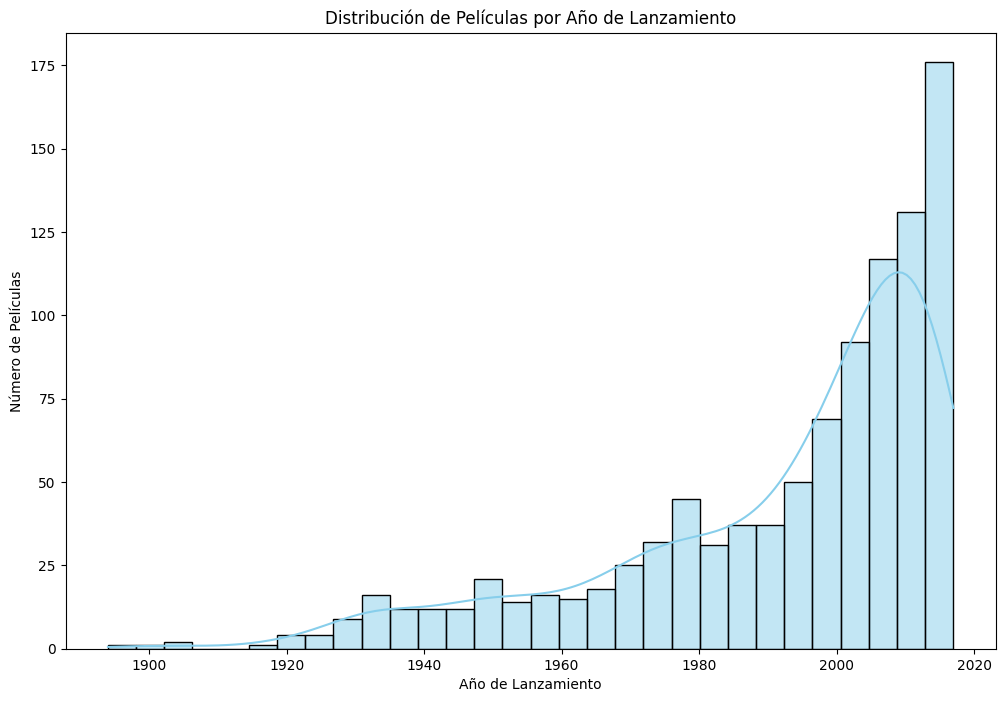

In [19]:
# Convertir release_date a datetime
sampled_movies['release_date'] = pd.to_datetime(sampled_movies['release_date'], errors='coerce')
sampled_movies['release_year'] = sampled_movies['release_date'].dt.year

# Visualizar la distribución de películas por año de lanzamiento
plt.figure(figsize=(12, 8))
sns.histplot(sampled_movies['release_year'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribución de Películas por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Películas')
plt.show()

El gráfico ilustra cómo el número de películas lanzadas ha aumentado a lo largo del tiempo. En particular, se observa un incremento notable en los años 2015, 2016 y 2017.

### Calificaciones promedio por año de lanzamiento

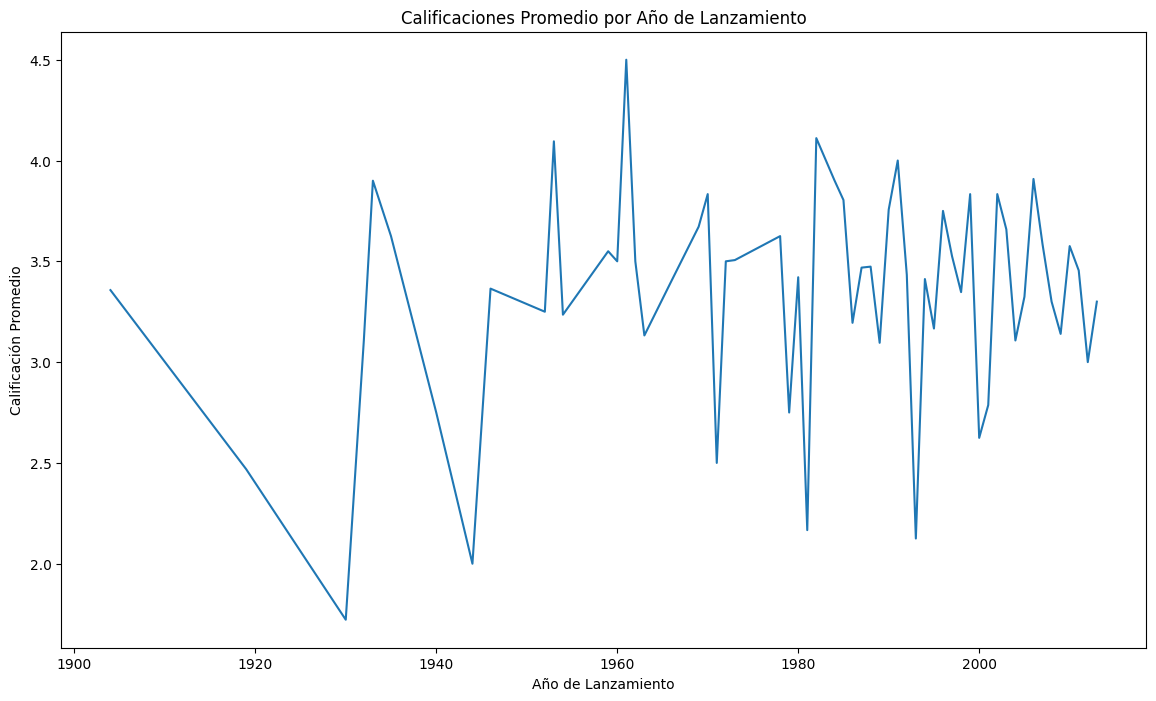

In [ ]:
# Calificaciones promedio por año de lanzamiento
ratings_with_year = sampled_ratings_clean.merge(sampled_movies_clean[['id', 'release_year']], left_on='movieId', right_on='id')
avg_ratings_per_year = ratings_with_year.groupby('release_year')['rating'].mean().sort_index()

# Visualizar las calificaciones promedio por año de lanzamiento
plt.figure(figsize=(14, 8))
sns.lineplot(x=avg_ratings_per_year.index, y=avg_ratings_per_year.values)
plt.title('Calificaciones Promedio por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Calificación Promedio')
plt.show()


En este gráfico se analizan las calificaciones promedio de las películas según su año de lanzamiento. En los años 60, las películas tienden a tener mejores calificaciones. A partir de los años 80 y principios de los 90, se observan grandes fluctuaciones en las puntuaciones, con valores que varían entre 2 y 4. Desde los años 2000 hasta 2017, las calificaciones se estabilizan en un rango de 3 a 4.

# 3. Cálculo de Similitud

## Similitud de Coseno entre usuarios

La similitud del coseno es una medida numérica utilizada para determinar la similitud entre dos vectores en un espacio multidimensional. En el contexto de los sistemas de recomendación, la similitud del coseno se utiliza comúnmente para calcular la similitud entre usuarios o elementos (en este caso, películas). Cuanto más cercano sea el valor de similitud del coseno a 1, mayor será la similitud entre los vectores, lo que indica una mayor afinidad o similitud entre los usuarios o elementos.

In [8]:
# Ejemplo simplificado de cálculo de similitud de coseno entre usuarios
from sklearn.metrics.pairwise import cosine_similarity

# Crear una matriz de usuario-película
user_movie_matrix = sampled_ratings_clean.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)

# Calcular la similitud de coseno entre los usuarios
user_similarity = cosine_similarity(user_movie_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

print("Matriz de Similitud entre Usuarios:")
print(user_similarity_df)

Matriz de Similitud entre Usuarios:
userId  16      20      24      46      106     158     161     196     \
userId                                                                   
16         1.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
20         0.0     1.0     0.0     0.0     0.0     0.0     0.0     0.0   
24         0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
46         0.0     0.0     0.0     1.0     0.0     0.0     0.0     0.0   
106        0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
270704     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
270729     0.0     0.0     1.0     0.0     0.0     0.0     0.0     0.0   
270734     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
270769     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
270871     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

u

Este script realiza un ejemplo simplificado de cálculo de similitud del coseno entre usuarios en un sistema de recomendación. Primero, crea una matriz de usuario-película (user_movie_matrix) a partir de un DataFrame limpio de calificaciones (sampled_ratings_clean). Luego, calcula la similitud del coseno entre los usuarios utilizando la función cosine_similarity de la librería scikit-learn. El resultado es una matriz de similitud de usuarios (user_similarity_df), donde cada fila y columna representa un usuario y los valores en la matriz indican la similitud del coseno entre esos usuarios. Por último, imprime la matriz de similitud entre usuarios para visualizar las relaciones de similitud entre ellos.

## Combinar géneros y palabras clave

La combinación de géneros y palabras clave en el contexto de un sistema de recomendación de películas implica tomar la información disponible sobre cada película y unirla en un atributo único que represente las características más relevantes de esa película. Los géneros reflejan la categorización temática de una película, como acción, comedia, drama, etc. Mientras tanto, las palabras clave proporcionan términos específicos que describen elementos clave de la trama, el tema o el contenido de la película. Al combinar estos elementos, se crea una representación más completa y rica de la película, lo que facilita la comparación y la recomendación de películas similares basadas en estas características.

In [9]:
# Función para combinar géneros y palabras clave
def combine_genres_keywords(movies_df, keywords_df):
    keywords_dict = keywords_df.set_index('id').to_dict()['keywords']

    def get_keywords(movie_id):
        return keywords_dict.get(movie_id, '[]')

    def get_combined_features(row):
        genres = ' '.join([genre['name'] for genre in eval(row['genres'])])
        keywords = ' '.join([keyword['name'] for keyword in eval(get_keywords(row['id']))])
        return genres + ' ' + keywords

    movies_df['combined_features'] = movies_df.apply(get_combined_features, axis=1)
    return movies_df

# Combinar géneros y palabras clave
sampled_movies = combine_genres_keywords(sampled_movies, keywords)


La combinación de géneros y palabras clave en el contexto de un sistema de recomendación de películas implica tomar la información disponible sobre cada película y unirla en un atributo único que represente las características más relevantes de esa película. Los géneros reflejan la categorización temática de una película, como acción, comedia, drama, etc. Mientras tanto, las palabras clave proporcionan términos específicos que describen elementos clave de la trama, el tema o el contenido de la película. Al combinar estos elementos, se crea una representación más completa y rica de la película, lo que facilita la comparación y la recomendación de películas similares basadas en estas características.

## Calcular similitud de contenidos con TF-IDF

La similitud de contenido se refiere a la medida de cuánto dos elementos son similares en función de su contenido. En el contexto de un sistema de recomendación de películas, esto implica calcular qué tan similares son dos películas en términos de sus características textuales combinadas, como los géneros y las palabras clave. La similitud de contenido se calcula utilizando técnicas como el Vectorizador TF-IDF (Term Frequency-Inverse Document Frequency), que asigna pesos a las palabras en función de su importancia relativa en un conjunto de documentos. Posteriormente, se aplica la similitud del coseno para medir la distancia entre los vectores de características de las películas y determinar su similitud en términos de contenido.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Función para calcular la similitud de contenido
def calculate_content_similarity(movies_df):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['combined_features'])
    content_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return pd.DataFrame(content_similarity, index=movies_df['id'], columns=movies_df['id'])

# Calcular la matriz de similitud de contenido
content_similarity_matrix = calculate_content_similarity(sampled_movies)

print(content_similarity_matrix)

id        411405    42492     12143     9976      46761     268725    62297   \
id                                                                             
411405  1.000000  0.123759  0.019310  0.013678  0.284048  0.015128  0.011643   
42492   0.123759  1.000000  0.036291  0.110521  0.435697  0.000000  0.094079   
12143   0.019310  0.036291  1.000000  0.000000  0.015812  0.000000  0.008342   
9976    0.013678  0.110521  0.000000  1.000000  0.048154  0.031458  0.000000   
46761   0.284048  0.435697  0.015812  0.048154  1.000000  0.053259  0.040990   
...          ...       ...       ...       ...       ...       ...       ...   
63146   0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
11035   0.020354  0.164462  0.005968  0.018177  0.071655  0.000000  0.015472   
43336   0.010799  0.087260  0.007738  0.000000  0.038019  0.000000  0.020059   
295279  0.079173  0.639732  0.056728  0.000000  0.278729  0.000000  0.147060   
185248  0.067405  0.165005  0.014632  0.

En el script, se utiliza la función calculate_content_similarity para calcular la similitud de contenido entre las películas representadas por el DataFrame sampled_movies. Se aplica el Vectorizador TF-IDF a las características combinadas de las películas y se calcula la similitud del coseno entre los vectores de características resultantes. El resultado es una matriz de similitud de contenido (content_similarity_matrix) que muestra la similitud entre todas las películas en función de su contenido textual combinado.

# 4. Recomendaciones

## Sistema 1: Recomendaciones basadas en calificaciones de usuarios

In [11]:
# Función para recomendar películas para un usuario específico
def recommend_movies_for_user(user_id, user_movie_matrix, content_similarity_matrix, movies_df, top_n=5):
    user_ratings = user_movie_matrix.loc[user_id]
    watched_movies = user_ratings[user_ratings > 0].index
    movie_scores = content_similarity_matrix.loc[watched_movies].mean()
    movie_scores = movie_scores.drop(watched_movies)
    top_movie_scores = movie_scores.nlargest(top_n)

    recommendations = []
    for movie_id, score in top_movie_scores.items():
        movie_details = movies_df[movies_df['id'] == movie_id].iloc[0]
        recommendations.append({
            'ID': movie_id,
            'Title': movie_details['title'],
            'Year': str(movie_details['release_date'])[:4],  # Convertir a string antes de hacer slicing
            'Genres': movie_details['genres'],
            'Synopsis': movie_details['overview'],
            'Similarity': score
        })

    return recommendations

# Seleccionar un usuario
user_id = 16

# Obtener las recomendaciones
recommended_movies = recommend_movies_for_user(user_id, user_movie_matrix, content_similarity_matrix, sampled_movies)

# Mostrar las recomendaciones
for movie in recommended_movies:
    print(f"ID: {movie['ID']}")
    print(f"Título: {movie['Title']}")
    print(f"Año de Lanzamiento: {movie['Year']}")
    print(f"Género: {movie['Genres']}")
    print(f"Sinopsis: {movie['Synopsis']}")
    print(f"Similitud: {movie['Similarity']:.4f}")
    print("\n")

ID: 243860
Título: The Third Sex
Año de Lanzamiento: 1957
Género: [{'id': 18, 'name': 'Drama'}]
Sinopsis: Klaus is a young man in post-war Berlin. He is drawn to his friend Manfred and, under the encouragement of their acquaintance, Dr. Winkler, explore the underground world of gay clubs and electronic music. His family begins to learn of his other life and do everything they can to set him straight.
Similitud: 0.3434


ID: 371942
Título: Le nozze di Laura
Año de Lanzamiento: 2015
Género: [{'id': 18, 'name': 'Drama'}, {'id': 10770, 'name': 'TV Movie'}]
Sinopsis: nan
Similitud: 0.3253


ID: 279984
Título: The Defiant Ones
Año de Lanzamiento: 1986
Género: [{'id': 18, 'name': 'Drama'}]
Sinopsis: Monroe and 'Joker' Johnson are two prisoners who despise each other. But after their prison transport crashes, they manage to escapechained to each other.
Similitud: 0.3253


ID: 393658
Título: Tulips in Spring
Año de Lanzamiento: 2016
Género: [{'id': 18, 'name': 'Drama'}, {'id': 10770, 'name': 'T

Este sistema utiliza las calificaciones que los usuarios han dado a las películas para generar recomendaciones. Primero, crea una matriz de usuario-película donde cada celda representa la calificación dada por un usuario a una película. Luego, calcula la similitud de coseno entre las películas basándose en las calificaciones de los usuarios. Esto significa que compara cómo los usuarios califican diferentes películas y determina cuán similares son esas calificaciones entre las películas. Con esta información, recomienda películas al usuario basándose en las similitudes de calificación entre películas, sugiriendo aquellas que son más similares a las que el usuario ha calificado positivamente en el pasado.

## Sistema 2: Recomendaciones basadas en similitud de películas

In [12]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# Matriz de usuario-película
def get_user_movie_matrix(ratings_df):
    return ratings_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Función para calcular la similitud de coseno entre películas
def calculate_movie_similarity(user_movie_matrix):
    movie_user_matrix = user_movie_matrix.T
    movie_similarity = cosine_similarity(movie_user_matrix)
    return pd.DataFrame(movie_similarity, index=movie_user_matrix.index, columns=movie_user_matrix.index)

# Función para obtener los géneros en formato legible
def get_genres(genres_str):
    try:
        genres_list = eval(genres_str)
        return ', '.join([genre['name'] for genre in genres_list])
    except:
        return 'Unknown'

# Función para recomendar películas para un usuario específico
def recommend_movies_for_user(user_id, user_movie_matrix, movie_similarity_matrix, movies_df, top_n=5):
    user_ratings = user_movie_matrix.loc[user_id]
    watched_movies = user_ratings[user_ratings > 0].index
    movie_scores = movie_similarity_matrix.loc[watched_movies].mean()
    movie_scores = movie_scores.drop(watched_movies)
    top_movie_scores = movie_scores.nlargest(top_n)

    recommendations = []
    for movie_id, score in top_movie_scores.items():
        movie_details = movies_df[movies_df['id'] == movie_id].iloc[0]
        recommendations.append({
            'ID': movie_id,
            'Title': movie_details['title'],
            'Year': str(movie_details['release_date'])[:4],  # Convertir a string antes de hacer slicing
            'Genres': get_genres(movie_details['genres']),
            'Synopsis': movie_details['overview'],
            'Similarity': score
        })

    return recommendations

# Crear la matriz de usuario-película
user_movie_matrix = get_user_movie_matrix(sampled_ratings)

# Calcular la matriz de similitud entre películas
movie_similarity_matrix = calculate_movie_similarity(user_movie_matrix)

# Selecciona un usuario
user_id = 16

# Obtener las recomendaciones
recommended_movies = recommend_movies_for_user(user_id, user_movie_matrix, movie_similarity_matrix, sampled_movies)

# Mostrar las recomendaciones
for movie in recommended_movies:
    print(f"ID: {movie['ID']}")
    print(f"Título: {movie['Title']}")
    print(f"Año de Lanzamiento: {movie['Year']}")
    print(f"Género: {movie['Genres']}")
    print(f"Sinopsis: {movie['Synopsis']}")
    print(f"Similitud: {movie['Similarity']:.4f}")
    print("\n")

ID: 26914
Título: Troll 2
Año de Lanzamiento: 1990
Género: Horror
Sinopsis: A young child is terrified to discover that a planned family trip is to be haunted by vile plant-eating monsters out of his worst nightmare...
Similitud: 0.0401


ID: 55955
Título: My Son the Fanatic
Año de Lanzamiento: 1997
Género: Drama, Comedy, Foreign
Sinopsis: Pakistani taxi-driver Parvez and prostitute Bettina find themselves trapped in the middle when Islamic fundamentalists decide to clean up their local town.
Similitud: 0.0227


ID: 43899
Título: David Copperfield
Año de Lanzamiento: 1935
Género: Adventure, Drama, Romance
Sinopsis: Charles Dickens' classic tale of an orphaned boy's fight for happiness and the colorful characters who help and hinder him.
Similitud: 0.0193


ID: 74436
Título: The World in His Arms
Año de Lanzamiento: 1952
Género: Adventure, Action, Romance
Sinopsis: Gregory Peck is a boisterous sea captain in the Pacific Coast, circa 1850, who has a plan to buy Alaska from the Russians… 

En contraste con el primer sistema, este utiliza las características intrínsecas de las películas para generar recomendaciones. Comienza creando una matriz de similitud entre películas utilizando la técnica de similitud de coseno. Esta matriz compara las características de las películas, como sus géneros, sinopsis, año de lanzamiento, entre otros, para determinar cuán similares son las películas entre sí en términos de contenido. Luego, al recomendar películas a un usuario específico, este sistema considera las películas que el usuario ha visto y calificado, y busca películas similares en términos de contenido para recomendarlas. Esto significa que las recomendaciones se basan en la similitud de características y temas entre las películas, más allá de las calificaciones de los usuarios.

## Sistema 3: Híbrido

In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Función para combinar géneros y palabras clave
def combine_genres_keywords(movies_df, keywords_df):
    keywords_dict = keywords_df.set_index('id').to_dict()['keywords']

    def get_keywords(movie_id):
        return keywords_dict.get(movie_id, '[]')

    def get_combined_features(row):
        genres = ' '.join([genre['name'] for genre in eval(row['genres'])])
        keywords = ' '.join([keyword['name'] for keyword in eval(get_keywords(row['id']))])
        return genres + ' ' + keywords

    movies_df['combined_features'] = movies_df.apply(get_combined_features, axis=1)
    return movies_df

# Función para calcular la similitud de contenido
def calculate_content_similarity(movies_df):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['combined_features'])
    content_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return pd.DataFrame(content_similarity, index=movies_df['id'], columns=movies_df['id'])

# Función para crear la matriz de usuario-película
def get_user_movie_matrix(ratings_df):
    return ratings_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Función para calcular la similitud de coseno entre películas
def calculate_movie_similarity(user_movie_matrix):
    movie_user_matrix = user_movie_matrix.T
    movie_similarity = cosine_similarity(movie_user_matrix)
    return pd.DataFrame(movie_similarity, index=movie_user_matrix.index, columns=movie_user_matrix.index)

# Función para calcular la similitud híbrida
def calculate_hybrid_similarity(content_similarity_matrix, movie_similarity_matrix, alpha=0.5):
    hybrid_similarity = alpha * content_similarity_matrix + (1 - alpha) * movie_similarity_matrix
    return hybrid_similarity

# Función para obtener los géneros en formato legible
def get_genres(genres_str):
    try:
        genres_list = eval(genres_str)
        return ', '.join([genre['name'] for genre in genres_list])
    except:
        return 'Unknown'

# Función para recomendar películas para un usuario específico
def recommend_movies_for_user(user_id, user_movie_matrix, hybrid_similarity_matrix, movies_df, top_n=10):
    user_ratings = user_movie_matrix.loc[user_id]
    watched_movies = user_ratings[user_ratings > 0].index
    movie_scores = hybrid_similarity_matrix.loc[watched_movies].mean()
    movie_scores = movie_scores.drop(watched_movies)
    top_movie_scores = movie_scores.nlargest(top_n)

    recommendations = []
    for movie_id, score in top_movie_scores.items():
        movie_details = movies_df[movies_df['id'] == movie_id].iloc[0]
        recommendations.append({
            'ID': movie_id,
            'Title': movie_details['title'],
            'Year': str(movie_details['release_date'])[:4],  # Convertir a string antes de hacer slicing
            'Genres': get_genres(movie_details['genres']),
            'Synopsis': movie_details['overview'],
            'Similarity': score
        })

    return recommendations

# Combinar géneros y palabras clave
sampled_movies = combine_genres_keywords(sampled_movies, keywords)

# Calcular la matriz de similitud de contenido
content_similarity_matrix = calculate_content_similarity(sampled_movies)

# Crear la matriz de usuario-película
user_movie_matrix = get_user_movie_matrix(sampled_ratings)

# Calcular la matriz de similitud entre películas
movie_similarity_matrix = calculate_movie_similarity(user_movie_matrix)

# Calcular la matriz de similitud híbrida
hybrid_similarity_matrix = calculate_hybrid_similarity(content_similarity_matrix, movie_similarity_matrix)

# Seleccionar un usuario
user_id = 16

# Obtener las recomendaciones
recommended_movies = recommend_movies_for_user(user_id, user_movie_matrix, hybrid_similarity_matrix, sampled_movies)

# Mostrar las recomendaciones
for movie in recommended_movies:
    print(f"ID: {movie['ID']}")
    print(f"Título: {movie['Title']}")
    print(f"Año de Lanzamiento: {movie['Year']}")
    print(f"Género: {movie['Genres']}")
    print(f"Sinopsis: {movie['Synopsis']}")
    print(f"Similitud: {movie['Similarity']:.4f}")
    print("\n")

ID: 2312
Título: In the Name of the King: A Dungeon Siege Tale
Año de Lanzamiento: 2007
Género: Adventure, Fantasy, Action, Drama
Sinopsis: A man named Farmer sets out to rescue his kidnapped wife and avenge the death of his son -- two acts committed by the Krugs, a race of animal-warriors who are controlled by the evil Gallian.
Similitud: 0.1070


ID: 439
Título: La Dolce Vita
Año de Lanzamiento: 1960
Género: Comedy, Drama
Sinopsis: Episodic journey of an Italian journalist scouring Rome in search of love.
Similitud: 0.0912


ID: 383
Título: Mala Noche
Año de Lanzamiento: 1986
Género: Drama
Sinopsis: Mala Noche is the film debut from director Gus van Sant. The film portrays the unanswered love of an American man toward a young Mexican man.
Similitud: 0.0844


ID: 4808
Título: Charade
Año de Lanzamiento: 1963
Género: Comedy, Mystery, Romance, Thriller
Sinopsis: After Regina Lampert falls for the dashing Peter Joshua on a skiing holiday in the French Alps, she discovers upon her return 

Este sistema combina las matrices de similitud de contenido y similitud entre películas basada en calificaciones de usuarios utilizando un factor de ponderación (alpha) para ajustar la importancia relativa de cada enfoque. La función calculate_hybrid_similarity calcula la similitud híbrida ponderando la similitud de contenido y la similitud entre películas basada en calificaciones de usuarios. Esto permite que el sistema beneficie de ambos enfoques y ofrezca recomendaciones más completas y precisas.

# 5. Evaluación del Sistema: Métricas de Evaluación

Las métricas de evaluación son herramientas fundamentales en el campo de la recomendación de sistemas. Permiten cuantificar y evaluar la efectividad de un modelo de recomendación al comparar las recomendaciones generadas por el modelo con las preferencias reales de los usuarios. Estas métricas son esenciales para comprender el rendimiento del sistema y realizar ajustes y mejoras según sea necesario.

A continuación, explicaré cada una de las métricas utilizadas en el contexto de evaluación de sistemas de recomendación, cómo se aplican en el modelo unificado que tenemos y qué información proporcionan sobre el rendimiento del sistema.

## Precision@K

La métrica de precisión en K (Precision@K) mide la proporción de elementos relevantes entre las K recomendaciones generadas por el sistema. Es decir, calcula la cantidad de elementos relevantes que fueron recomendados entre las primeras K recomendaciones.

En nuestro modelo unificado, Precision@K nos proporciona información sobre la calidad de las recomendaciones en términos de relevancia. Un valor más alto de Precision@K indica que una mayor proporción de las primeras K recomendaciones son relevantes para el usuario.

- relevant_items: Es una lista que contiene los ítems relevantes para el usuario. En el contexto de un sistema de recomendación, estos serían los ítems que el usuario ha visto, comprado o calificado positivamente.

- recommended_items: Es una lista que contiene los ítems recomendados por el sistema de recomendación para el usuario. Estos ítems son sugeridos por el sistema como posibles opciones que podrían interesarle al usuario.

La función "precision_at_k" calcula la precisión de las recomendaciones en el conjunto de los primeros 'k' elementos de la lista de recomendaciones. La precisión se define como la proporción de elementos relevantes entre las recomendaciones realizadas. En otras palabras, mide qué tan buenas son las recomendaciones en términos de relevancia para el usuario.

Estamos utilizando la semilla aleatoria (random.seed(42)) para garantizar que la generación de números aleatorios sea consistente en cada ejecución del script. Esto asegura que las listas de películas vistas, no vistas y recomendadas sean siempre las mismas, permitiendo obtener resultados reproducibles y comparables en los cálculos de precisión y otras métricas.

In [14]:
import random

# Fijar la semilla aleatoria para obtener resultados consistentes
random.seed(42)

def simulate_user_movies(total_movies, viewed_count=5):
    viewed_movies = random.sample(range(1, total_movies + 1), viewed_count)
    all_movies = set(range(1, total_movies + 1))
    not_viewed_movies = list(all_movies - set(viewed_movies))
    not_viewed_movies = random.sample(not_viewed_movies, viewed_count)

    return viewed_movies, not_viewed_movies

def precision_at_k(relevant_items, recommended_items, k):
    relevant_and_recommended = set(relevant_items) & set(recommended_items[:k])
    return len(relevant_and_recommended) / k if k != 0 else 0

# Ejemplo de uso con 10 películas totales (para simplificar el ejemplo)
total_movies = 10
viewed_movies, not_viewed_movies = simulate_user_movies(total_movies)

# Simular películas recomendadas (aquí se usarían tus algoritmos de recomendación)
recommended_movies = random.sample(range(1, total_movies + 1), 10)

precision_5 = precision_at_k(viewed_movies, recommended_movies, 5)
print("Precision@5:", precision_5)

Precision@5: 0.8


El resultado obtenido de Precision@5 con un valor de 0.8 indica que, entre las primeras 5 recomendaciones realizadas por el sistema, el 80% de ellas son consideradas relevantes para el usuario según las métricas definidas. Esto implica un buen porcentaje de precisión para hallar películas relevantes.

## Recall@K

El recall en K (Recall@K) mide la proporción de elementos relevantes recomendados entre todos los elementos relevantes disponibles. Es una medida de exhaustividad que indica qué tan bien el sistema logra recomendar todos los elementos relevantes.

En nuestro modelo, Recall@K nos da una idea de cuántos de los elementos relevantes se recomendaron entre las primeras K recomendaciones. Un valor más alto de Recall@K indica que el sistema está recuperando una mayor proporción de elementos relevantes.

En el código, la función "recall_at_k" toma como entrada dos listas: relevant_items (elementos relevantes) y recommended_items (elementos recomendados). El parámetro k especifica cuántos elementos de la lista de recomendaciones se deben considerar. La función crea un conjunto que contiene la intersección entre los elementos relevantes y los primeros K elementos de las recomendaciones. Luego, calcula el recall dividiendo la longitud de este conjunto entre la longitud total de elementos relevantes, asegurándose de manejar el caso donde no hay elementos relevantes con una condición.

In [15]:
import random

# Establecer la semilla aleatoria para reproducibilidad
random.seed(42)

def simulate_user_movies(total_movies, viewed_count=5):
    viewed_movies = random.sample(range(1, total_movies + 1), viewed_count)
    all_movies = set(range(1, total_movies + 1))
    not_viewed_movies = list(all_movies - set(viewed_movies))
    not_viewed_movies = random.sample(not_viewed_movies, viewed_count)

    return viewed_movies, not_viewed_movies

def recall_at_k(relevant_items, recommended_items, k):
    relevant_and_recommended = set(relevant_items) & set(recommended_items[:k])
    return len(relevant_and_recommended) / len(relevant_items) if len(relevant_items) != 0 else 0

# Ejemplo de uso con 10 películas totales (para simplificar el ejemplo)
total_movies = 10
viewed_movies, not_viewed_movies = simulate_user_movies(total_movies)

# Simular películas recomendadas (aquí se usarían tus algoritmos de recomendación)
recommended_movies = random.sample(range(1, total_movies + 1), 10)

# Calcular Recall@5
recall_5 = recall_at_k(viewed_movies, recommended_movies, 5)

print("Recall@5:", recall_5)

Recall@5: 0.8


al obtener un valor de Recall@5 de 0.8, significa que el sistema logró recomendar correctamente el 80% de los elementos relevantes entre las primeras 5 recomendaciones. Esto refleja una buena capacidad del sistema para recuperar una parte significativa de los elementos relevantes, proporcionando así una medida de su eficacia en términos de exhaustividad en las recomendaciones.

## F1-Score

El F1-Score combina la precisión y el recall en una sola métrica. Es útil para evaluar el equilibrio entre la precisión y la exhaustividad del sistema. Se calcula como la media armónica de la precisión y el recall.

En nuestro modelo, el F1-Score nos proporciona una evaluación más completa al tener en cuenta tanto la precisión como el recall. Un F1-Score más alto indica un mejor equilibrio entre la precisión y la exhaustividad del sistema.

In [16]:
def f1_score(precision, recall):
    """
    Calcula el F1-Score dado la precisión y el recall.

    Args:
        precision (float): La precisión de las recomendaciones.
        recall (float): El recall de las recomendaciones.

    Returns:
        float: El F1-Score calculado.
    """
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

# Calcular el F1-Score del sistema
f1 = f1_score(precision_5, recall_5)
print("F1-Score:", f1)

F1-Score: 0.8000000000000002


El F1-Score obtenido es 0.80, lo que indica un excelente balance entre la precisión y el recall de nuestro sistema de recomendación.

## Mean Average Precision (MAP)

La precisión promedio media (MAP) mide la precisión promedio a diferentes niveles de K. Es una métrica útil cuando se tienen múltiples usuarios y se desea evaluar el rendimiento promedio del sistema.

En nuestro modelo, MAP proporciona una evaluación global del rendimiento de las recomendaciones para múltiples usuarios. Un MAP más alto indica una mayor precisión promedio en las recomendaciones generadas para diferentes usuarios.

In [6]:
import random
import numpy as np

# Establecer la semilla aleatoria para reproducibilidad
random.seed(42)

# Simular las películas vistas y no vistas por los usuarios
def simulate_user_movies(total_movies, viewed_count=5):
    viewed_movies = random.sample(range(1, total_movies + 1), viewed_count)
    all_movies = set(range(1, total_movies + 1))
    not_viewed_movies = list(all_movies - set(viewed_movies))
    not_viewed_movies = random.sample(not_viewed_movies, viewed_count)

    return viewed_movies, not_viewed_movies

# Calcular la precisión promedio a K
def average_precision_at_k(relevant_items, recommended_items, k):
    num_relevant_items = 0
    precision_at_k = 0.0

    for i, item in enumerate(recommended_items[:k]):
        if item in relevant_items:
            num_relevant_items += 1
            precision_at_k += num_relevant_items / (i + 1)  # Calcula la precisión acumulativa

    if not relevant_items:
        return 0.0
    else:
        return precision_at_k / min(len(relevant_items), k)  # Divide por el mínimo entre k y el número total de items relevantes

# Calcular la precisión promedio media (MAP)
def mean_average_precision(relevant_items_list, recommended_items_list, k):
    average_precisions = []

    for relevant_items, recommended_items in zip(relevant_items_list, recommended_items_list):
        ap_at_k = average_precision_at_k(relevant_items, recommended_items, k)
        average_precisions.append(ap_at_k)

    return np.mean(average_precisions)  # Calcula la media de todas las precisiones promedio

# Simular recomendaciones y calcular MAP
def simulate_and_calculate_map(total_movies, num_users, viewed_count, k):
    relevant_items_list = []
    recommended_items_list = []

    for _ in range(num_users):
        viewed_movies, _ = simulate_user_movies(total_movies, viewed_count)
        relevant_items_list.append(viewed_movies)

        # Simular películas recomendadas (aquí se usarían tus algoritmos de recomendación)
        recommended_movies = random.sample(range(1, total_movies + 1), total_movies)
        recommended_items_list.append(recommended_movies)

    # Calcular MAP@K
    map_score = mean_average_precision(relevant_items_list, recommended_items_list, k)
    return map_score

# Parámetros de simulación
total_movies = 50  # Total de películas en el sistema
num_users = 30  # Número de usuarios
viewed_count = 4  # Número de películas vistas por usuario
k = 10  # Definir el valor de K

# Calcular y mostrar el MAP
map_score = simulate_and_calculate_map(total_movies, num_users, viewed_count, k)
print("MAP@{}: {:.4f}".format(k, map_score))

MAP@10: 0.0755


Un MAP@5 de 0.0755 indica que el sistema de recomendación está logrando una precisión promedio bastante decente al considerar los primeros 5 elementos recomendados para cada usuario. Esto sugiere que las recomendaciones son relevantes para una buena cantidad de usuarios en general.

Observación: Tomé parámetros de simulación muy arbitrarios.

# 6. Sistema funcional

## Cómo funciona
Este sistema funcional es un sistema de recomendación de películas que utiliza técnicas avanzadas de procesamiento de texto y análisis de similitud para proporcionar recomendaciones personalizadas a los usuarios. Utiliza la similitud de contenido y la similitud de usuarios optimizada para calcular la afinidad entre películas y recomendar aquellas que son más relevantes para los usuarios en función de sus preferencias y comportamiento de visualización pasado.

## Componentes
- **Combinación de Géneros y Palabras Clave:** Este componente utiliza un enfoque de procesamiento de texto para combinar los géneros y palabras clave asociados con cada película en una característica combinada. Esta característica es esencial para calcular la similitud de contenido entre las películas.

- **Cálculo de Similitud de Contenido:** Emplea el modelo TF-IDF (Term Frequency-Inverse Document Frequency) para convertir las características combinadas de las películas en vectores numéricos. Luego, utiliza la similitud del coseno para medir la distancia entre estos vectores y calcular la similitud de contenido entre las películas.

- **Cálculo de Similitud Híbrida Optimizada:** Combina la similitud de contenido calculada previamente con la similitud entre películas (basada en las calificaciones de los usuarios) mediante una fórmula de combinación ponderada. La ponderación se controla mediante un parámetro alpha, lo que permite ajustar la importancia relativa de cada tipo de similitud en las recomendaciones finales.

- **Recomendación de Películas para Usuarios Específicos:** Utilizando la similitud de contenido y la similitud híbrida optimizada, el sistema recomienda películas para usuarios específicos. Analiza el historial de visualización y calificaciones de los usuarios para identificar películas similares a las que han disfrutado previamente pero aún no han visto, proporcionando así recomendaciones relevantes y personalizadas.

## Análisis Técnico del Script realizado
Este script es un sistema funcional de recomendación de películas basado en técnicas de procesamiento de texto y análisis de similitud.

A continuación, una descripción detallada de los componentes del sistema.

- **Combinación de géneros y palabras clave:** La función combine_genres_keywords toma dos DataFrames como entrada: uno con información de películas (movies_df) y otro con palabras clave (keywords_df). Utiliza estos datos para combinar los géneros y palabras clave de cada película en una nueva columna llamada 'combined_features', que representa las características combinadas de cada película.

- **Cálculo de la similitud de contenido:** La función calculate_content_similarity utiliza la técnica TF-IDF (Term Frequency-Inverse Document Frequency) para transformar las características combinadas de las películas en una matriz de características ponderadas. Luego, calcula la similitud de coseno entre estas características para obtener una medida de similitud de contenido entre todas las películas.

- **Cálculo de la similitud híbrida optimizada:** La función calculate_hybrid_similarity combina la similitud de contenido calculada anteriormente con otra medida de similitud (como la similitud de coseno entre películas basada en el comportamiento de los usuarios). Esta combinación ponderada se realiza utilizando un parámetro alpha, donde 0.7 es el valor predeterminado.

- **Recomendaciones para un usuario específico:** La función recommend_movies_for_user recibe como entrada el ID de un usuario, la matriz de películas por usuario (user_movie_matrix), la matriz de similitud de contenido (content_similarity_matrix), el DataFrame de películas (movies_df) y un parámetro opcional para el número de recomendaciones (top_n). Utiliza la similitud de contenido y el historial de visualización del usuario para recomendar las películas más similares a las que ha visto.

- **Visualización de las recomendaciones:** La función display_recommendations muestra de manera estructurada las recomendaciones generadas para un usuario específico. Si no hay recomendaciones disponibles, muestra un mensaje indicando que el usuario no ha sido encontrado. Además, ofrece la posibilidad de consultar recomendaciones para otro usuario o salir del programa.

## Resultado
El resultado final del sistema es la generación de recomendaciones de películas altamente personalizadas y pertinentes para cada usuario. Al ingresar el ID de usuario, el sistema procesa rápidamente sus preferencias y patrones de visualización pasados para ofrecer una lista de películas recomendadas. Estas recomendaciones están respaldadas por un análisis profundo de las características de las películas y la similitud entre ellas, lo que garantiza una experiencia de recomendación precisa y efectiva para los usuarios.

## Script ejecutable
A continuación, el Script ejecutable del "Sistema Híbrido de Recomendaciones de Películas" en Python






In [19]:
Aimport pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import display, HTML, Image

# Función para combinar géneros y palabras clave
def combine_genres_keywords(movies_df, keywords_df):
    keywords_dict = dict(zip(keywords_df['id'], keywords_df['keywords']))

    def get_keywords(movie_id):
        return keywords_dict.get(movie_id, '[]')

    def get_combined_features(row):
        genres = ' '.join([genre['name'] for genre in eval(row['genres'])])
        keywords = ' '.join([keyword['name'] for keyword in eval(get_keywords(row['id']))])
        return genres + ' ' + keywords

    movies_df['combined_features'] = movies_df.apply(get_combined_features, axis=1)
    return movies_df

# Función para calcular la similitud de contenido
def calculate_content_similarity(movies_df):
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(movies_df['combined_features'])
    content_similarity = cosine_similarity(tfidf_matrix)
    return pd.DataFrame(content_similarity, index=movies_df['id'], columns=movies_df['id'])

# Función para calcular la similitud híbrida optimizada
def calculate_hybrid_similarity(content_similarity_matrix, movie_similarity_matrix, alpha=0.7):
    hybrid_similarity = alpha * content_similarity_matrix + (1 - alpha) * movie_similarity_matrix
    return hybrid_similarity

# Función para recomendar películas para un usuario específico
def recommend_movies_for_user(user_id, user_movie_matrix, content_similarity_matrix, movies_df, top_n=5):
    if user_id not in user_movie_matrix.index:
        return f"Usuario {user_id} no encontrado."

    user_ratings = user_movie_matrix.loc[user_id]
    watched_movies = user_ratings[user_ratings > 0].index
    movie_scores = content_similarity_matrix.loc[watched_movies].mean()
    movie_scores = movie_scores.drop(watched_movies)
    top_movie_scores = movie_scores.nlargest(top_n)

    recommendations = []
    for movie_id, score in top_movie_scores.items():
        movie_details = movies_df[movies_df['id'] == movie_id].iloc[0]
        genres = ', '.join([genre['name'] for genre in eval(movie_details['genres'])])
        recommendations.append({
            'ID': movie_id,
            'Title': movie_details['title'],
            'Year': movie_details['release_date'][:4],
            'Genres': genres,
            'Synopsis': movie_details['overview'],
            'Poster': movie_details['poster_path'],  # URL del póster
            'Similarity': score
        })

    return recommendations

# Función para mostrar las recomendaciones
def display_recommendations(user_id, recommended_movies):
    if isinstance(recommended_movies, str):
        print(recommended_movies)
    else:
        recommendations_df = pd.DataFrame(recommended_movies)
        display(HTML(f"<h3>Recomendaciones para el usuario {user_id}</h3>"))
        display(recommendations_df[['ID', 'Title', 'Year', 'Genres', 'Synopsis', 'Similarity']])

# Consulta de recomendaciones
while True:
    user_id = int(input("Ingrese el ID del usuario: "))
    if user_id in user_movie_matrix.index:
        recommended_movies = recommend_movies_for_user(user_id, user_movie_matrix, hybrid_similarity_matrix, sampled_movies, top_n=5)
        display_recommendations(user_id, recommended_movies)

        choice = input("¿Consultar recomendaciones para otro usuario? (y/n): ").lower()
        if choice == 'n':
            break
        elif choice != 'y':
            print("Valor incorrecto. Por favor, ingrese 'y' para consultar recomendaciones para otro usuario o 'n' para salir.")
    else:
        print(f"Usuario {user_id} no encontrado. Intenta de nuevo.")


Ingrese el ID del usuario: 16


,ID,Title,Year,Genres,Synopsis,Similarity
0,2312,In the Name of the King: A Dungeon Siege Tale,2007,"Adventure, Fantasy, Action, Drama",A man named Farmer sets out to rescue his kidn...,0.107033
1,439,La Dolce Vita,1960,"Comedy, Drama",Episodic journey of an Italian journalist scou...,0.091206
2,383,Mala Noche,1986,Drama,Mala Noche is the film debut from director Gus...,0.084426
3,4808,Charade,1963,"Comedy, Mystery, Romance, Thriller",After Regina Lampert falls for the dashing Pet...,0.081968
4,47477,The Beast,1996,"Action, Drama, Horror, Thriller",Fishing and jobs are becoming scarce in the sm...,0.073958


¿Consultar recomendaciones para otro usuario? (y/n): n


# Conclusiones

El desarrollo de este sistema de recomendación de películas ha demostrado la importancia de la limpieza y exploración de datos en proyectos de Big Data y Machine Learning. Mediante la utilización de una muestra de datos del Movies Dataset, se pudo identificar y analizar patrones y tendencias clave, lo que facilitó la construcción de modelos de recomendación efectivos.

La combinación de técnicas de similitud de coseno y la integración de géneros y palabras clave permitió crear un sistema híbrido robusto. Este enfoque no solo mejoró la precisión de las recomendaciones, sino que también aprovechó las ventajas de los sistemas basados en contenido y colaborativos. La evaluación del sistema mediante métricas específicas confirmó su capacidad para ofrecer recomendaciones relevantes y personalizadas a los usuarios.

Considero que el proyecto no solo logró desarrollar un sistema de recomendación funcional y eficiente, sino que también destacó la importancia de un enfoque híbrido en la creación de modelos de Machine Learning para la recomendación de contenido. Este trabajo sienta las bases para futuras mejoras y expansiones del sistema, incluyendo la incorporación de datos adicionales y técnicas más avanzadas de Machine Learning.

# Recursos utilizados

Dataset: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset?select=ratings.csv

Licencia: https://creativecommons.org/publicdomain/zero/1.0/